# setup

In [1]:
# plotting
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from matplotlib import pyplot as plt
from IPython.display import clear_output
from IPython.html.widgets import interact

plt.rcParams['figure.facecolor'] = (1, 1, 1)
plt.rcParams['axes.facecolor'] = (1, 1, 1)
plt.rcParams['xtick.direction'] = 'out'                                                                              
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Droid Sans']
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['xtick.major.size'] = 12
plt.rcParams['ytick.major.size'] = 12
plt.rcParams['figure.max_open_warning'] = 40
plt.rcParams['image.aspect'] = 'auto'
plt.rcParams['image.interpolation'] = 'nearest'

In [2]:
import glm
import simulation
from common import *

# 1D example

## source data

In [3]:
data = simulation.SimulatedData( N_sec=4 )

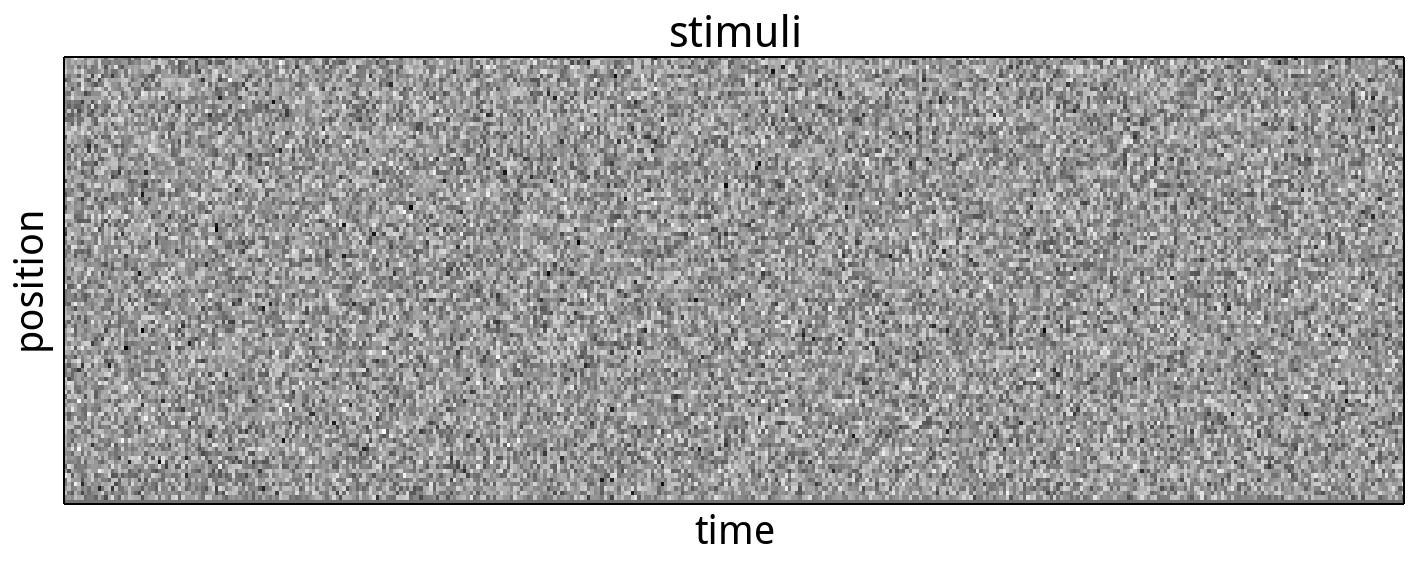

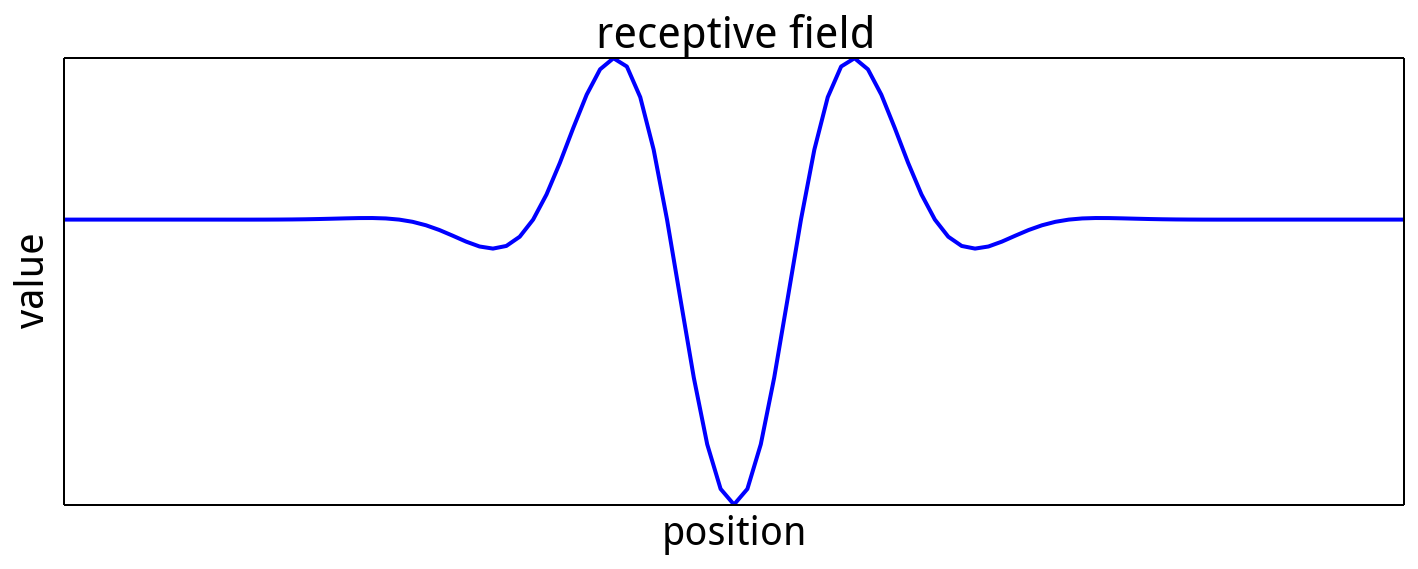

In [5]:
# plot stimuli
fig = plt.figure()
ax = fig.gca( xlabel='time', ylabel='position', xticks=[], yticks=[], title='stimuli' )
ax.imshow( data.X__td.T, cmap=plt.cm.Greys )

# plot receptive field
fig = plt.figure()
ax = fig.gca( xlabel='position', ylabel='value', xticks=[], yticks=[], title='receptive field' )
ax.plot( data.k_stim_true, lw=2 )
pass

## solving

In [6]:
# maximum likelihood solution
ml = glm.ML( data, testing_proportion=0.2 )
ml.solve( verbose=False )

# ridge penalised solution
ridge = glm.Ridge( data, testing_proportion=0.2 )
ridge.training_slices = ml.training_slices
ridge.testing_slices = ml.testing_slices
ridge.solve( verbose=False )

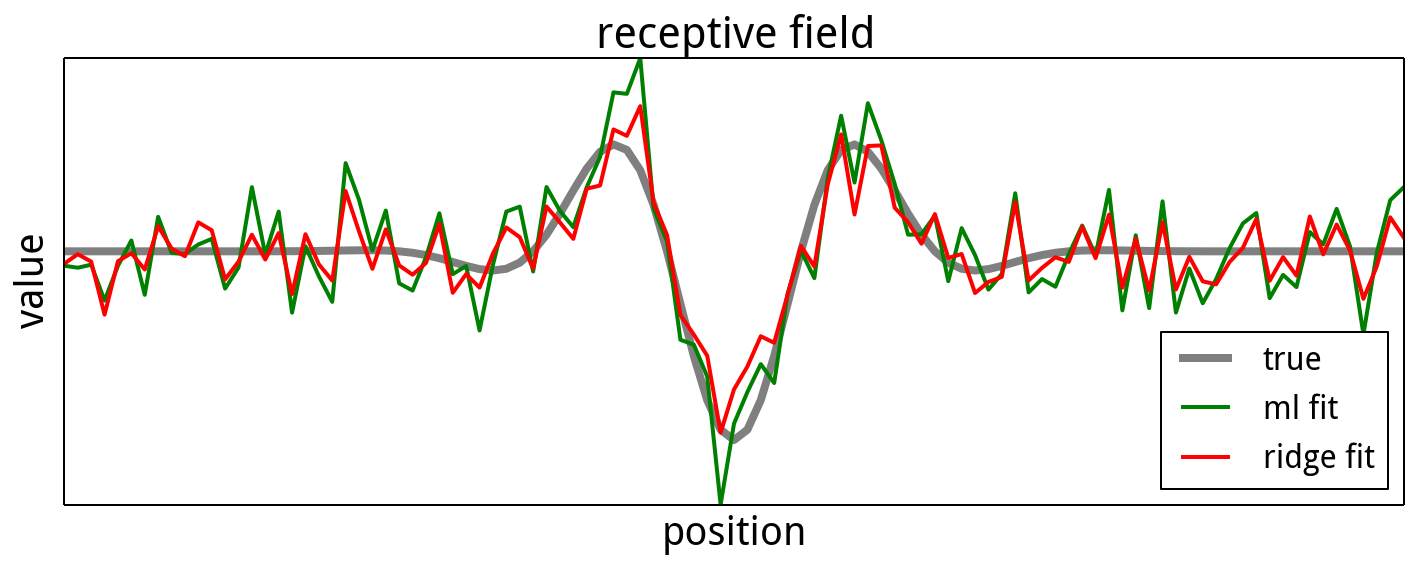

In [8]:
# plot receptive fields
fig = plt.figure()
ax = fig.gca( xlabel='position', ylabel='value', xticks=[], yticks=[], title='receptive field' )
ax.plot( data.k_stim_true, lw=4, label='true', color='k', alpha=0.5 )
ax.plot( ml.k__d[:-1], color='g', lw=2, label='ml fit' )
ax.plot( ridge.k__d[:-1], color='r', lw=2, label='ridge fit' )
ax.legend( loc='lower right', fontsize=16 )
pass

In [9]:
# ML overfits to the training data, makes poorer predictions on the testing data
print 'training: %.3f' % (ridge.LL_training_per_observation - ml.LL_training_per_observation)
print 'testing:  %.3f' % (ridge.LL_testing_per_observation - ml.LL_testing_per_observation)

training: -0.029
testing:  0.152


# 2D example

## source data

In [26]:
# construct class
class SimulatedData2D( simulation.SimulatedData ):
    
    def make_k_stim_true( self ):
        """ Generate stimulus-response relationship for simulation. """
        # dimensions
        self.D_x = D_x = 10
        self.D_y = D_y = 10
        self.D = D = D_x * D_y + 1 
        # create kernel
        i, j = np.meshgrid( np.arange(self.D_x), np.arange(self.D_y), indexing='ij' )
        k_stim_true_2D = np.exp(-0.5 * ((j - 3) ** 2 + (i - 5) ** 2))
        return k_stim_true_2D.flatten()

In [27]:
# instantiate
data = SimulatedData2D( N_sec=4 )

## solving

In [28]:
# maximum likelihood solution
ml = glm.ML( data, testing_proportion=0.2 )
ml.solve( verbose=False )

# ridge penalised solution
ridge = glm.Ridge( data, testing_proportion=0.2 )
ridge.training_slices = ml.training_slices
ridge.testing_slices = ml.testing_slices
ridge.solve( verbose=False )

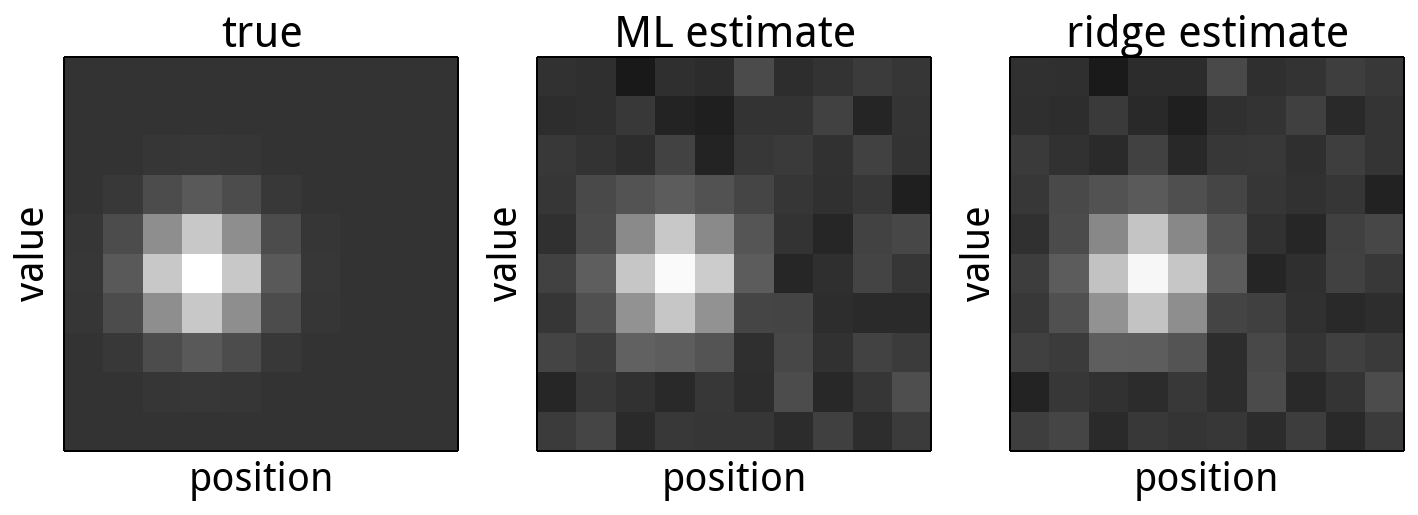

In [29]:
# plot receptive fields
fig = plt.figure()
ax = fig.add_subplot( 1, 3, 1, xlabel='position', ylabel='value', xticks=[], yticks=[], title='true' )
ax.imshow( data.k_stim_true.reshape(10, 10), cmap=plt.cm.Greys_r, vmin=-0.2, vmax=1 )
ax.set_aspect('equal')

ax = fig.add_subplot( 1, 3, 2, xlabel='position', ylabel='value', xticks=[], yticks=[], title='ML estimate' )
ax.imshow( ml.k__d[:-1].reshape(10, 10), cmap=plt.cm.Greys_r, vmin=-0.2, vmax=1 )
ax.set_aspect('equal')

ax = fig.add_subplot( 1, 3, 3, xlabel='position', ylabel='value', xticks=[], yticks=[], title='ridge estimate' )
ax.imshow( ridge.k__d[:-1].reshape(10, 10), cmap=plt.cm.Greys_r, vmin=-0.2, vmax=1 )
ax.set_aspect('equal')

pass

In [31]:
# ML overfits to the training data, makes poorer predictions on the testing data
print 'training: %.3f' % (ridge.LL_training_per_observation - ml.LL_training_per_observation)
print 'testing:  %.3f' % (ridge.LL_testing_per_observation - ml.LL_testing_per_observation)

training: -0.004
testing:  0.387


# GLM with history dependence

## source data

In [43]:
reload(simulation)

<module 'simulation' from 'simulation.py'>

In [44]:
class SimulatedData2DHistory( simulation.SimulatedDataHistory ):    

    def make_k_stim_true( self ):
        """ Generate stimulus-response relationship for simulation. """
        # dimensions
        self.D_x = D_x = 10
        self.D_y = D_y = 10
        self.D = D = D_x * D_y + 1 
        # create kernel
        i, j = np.meshgrid( np.arange(self.D_x), np.arange(self.D_y), indexing='ij' )
        k_true_2D = np.exp(-0.5 * ((j - 3) ** 2 + (i - 5) ** 2))
        k_true = k_true_2D.flatten()
        return k_true

In [45]:
# instantiate
data = SimulatedData2DHistory( N_sec=10 )

sampling from generative model.....ooooo[0s]


## solving

In [46]:
# maximum likelihood solution
ml = glm.ML( data, testing_proportion=0.2 )
ml.solve( verbose=False )

# ridge penalised solution
ridge = glm.Ridge( data, testing_proportion=0.2 )
ridge.training_slices = ml.training_slices
ridge.testing_slices = ml.testing_slices
ridge.solve( verbose=False )

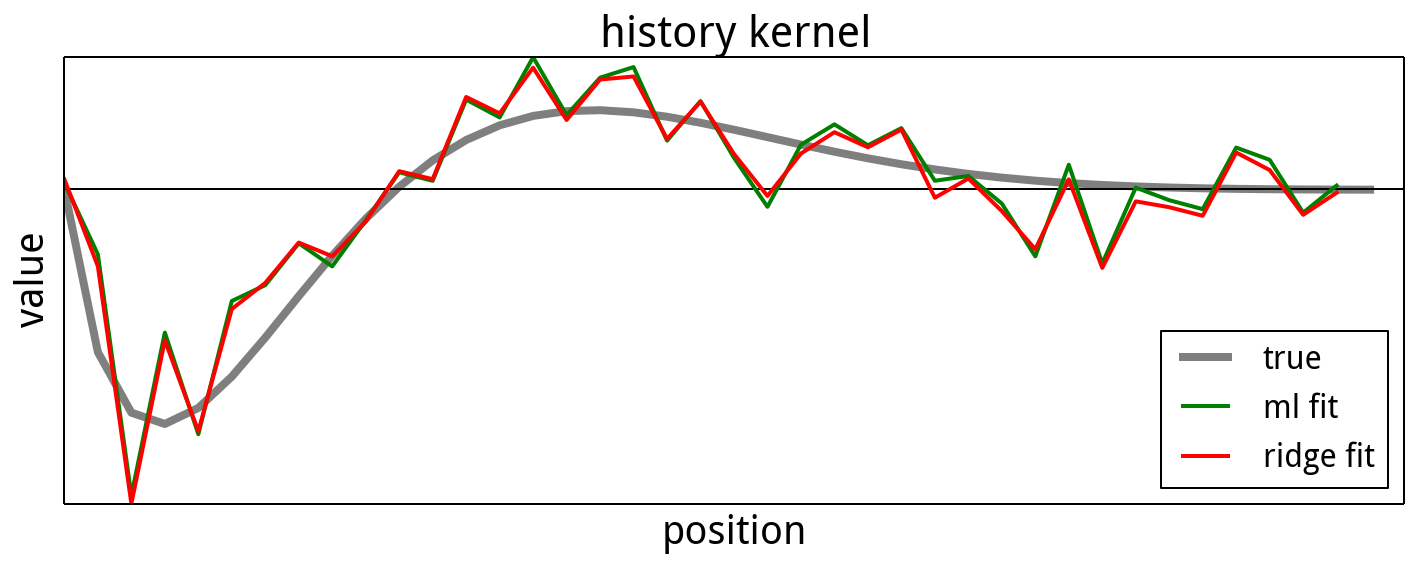

In [50]:
# plot history kernels
fig = plt.figure()
ax = fig.gca( xlabel='position', ylabel='value', xticks=[], yticks=[], title='history kernel' )
ax.plot([0, 40], [0, 0], 'k-')
ax.plot( data.k_history_true, lw=4, label='true', color='k', alpha=0.5 )
ax.plot( ml.k__d[-40:-1], color='g', lw=2, label='ml fit' )
ax.plot( ridge.k__d[-40:-1], color='r', lw=2, label='ridge fit' )
ax.legend( loc='lower right', fontsize=16 )
pass

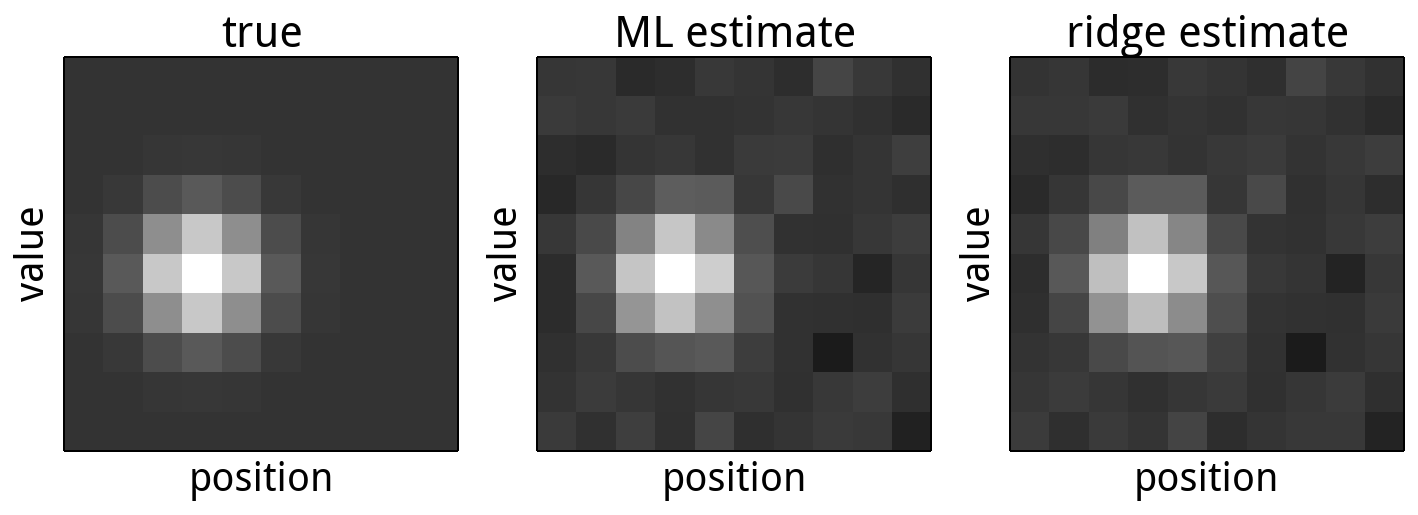

In [52]:
# plot receptive fields
fig = plt.figure()
ax = fig.add_subplot( 1, 3, 1, xlabel='position', ylabel='value', xticks=[], yticks=[], title='true' )
ax.imshow( data.k_true[:100].reshape(10, 10), cmap=plt.cm.Greys_r, vmin=-0.2, vmax=1 )
ax.set_aspect('equal')

ax = fig.add_subplot( 1, 3, 2, xlabel='position', ylabel='value', xticks=[], yticks=[], title='ML estimate' )
ax.imshow( ml.k__d[:100].reshape(10, 10), cmap=plt.cm.Greys_r, vmin=-0.2, vmax=1 )
ax.set_aspect('equal')

ax = fig.add_subplot( 1, 3, 3, xlabel='position', ylabel='value', xticks=[], yticks=[], title='ridge estimate' )
ax.imshow( ridge.k__d[:100].reshape(10, 10), cmap=plt.cm.Greys_r, vmin=-0.2, vmax=1 )
ax.set_aspect('equal')

pass